<a href="https://colab.research.google.com/github/SmartinternzprojectCKD/Early-Prediction-for-Chronic-Kidney-Disease-Detection-A-Progressive-Approach-to-Health-Management/blob/main/Prediction_for_Chronic_Kidney_DiseaseDetection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving chronickidneydisease_dataset.csv to chronickidneydisease_dataset.csv


In [ ]:
data = pd.read_csv("chronickidneydisease_dataset.csv")
data.head()
data.tail()
data.head(10)

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31   7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32   6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35   7300  4.6   no   no   no  good   no   no   
5  notpresent  ...   39   7800  4.4  yes  yes   no  good  yes   no   
6  notpresent  ...   36    NaN  NaN   no   no   no  good   no   no   
7  notpresent  ...   44   6900    5   no  yes   no  good  yes   no   
8  notpresent  ...   33   9600  4.0  yes  yes   no  good   no  yes   
9  notpresent  ...   29  12100  3.7  yes  yes   no  poor   no  yes   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  
5            ckd  
6            ckd  
7            ckd  
8            ckd  
9            ckd  

[10 rows x 26 columns]

In [ ]:
data.drop(["id"],axis=1,inplace=True)

In [ ]:

data.columns


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
    'pedal_edema', 'anemia', 'class'
]
data.columns
data.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   NaN   
2                  31                    7500                   NaN   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   

   hypertension  diabetesmellitus coronary_artery_disease appetite  \
0           yes               yes                      no     good   
1            no                no                      no     good   
2            no               yes                      no     poor   
3           yes                no                      no     poor   
4            no                no                      no     good   

  pedal_edema anemia class  
0          no     no   ckd  
1          no     no   ckd  
2          no    yes   ckd  
3         yes    yes   ckd  
4          no     no   ckd  

[5 rows x 25 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [ ]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data['class']=data['class'].replace("ckd\t",'ckd')
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'pedal_edema', 'hypertension', 'packed_cell_volume', 'pus_cell_clumps', 'white_blood_cell_count', 'red_blood_cell_count', 'diabetesmellitus', 'appetite', 'class', 'pus_cell', 'coronary_artery_disease', 'bacteria', 'red_blood_cells', 'anemia'}


In [ ]:
for i in catcols:
  print("Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns : pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
************************************************************************************************************************

Columns : hypertension
Counter({'no': 251, 'yes': 147, nan: 2})
************************************************************************************************************************

Columns : packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

Columns : pus_cell_clumps
Counter({'notpresent'

In [ ]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'pedal_edema', 'hypertension', 'pus_cell_clumps', 'diabetesmellitus', 'appetite', 'class', 'pus_cell', 'coronary_artery_disease', 'bacteria', 'red_blood_cells', 'anemia'}


In [ ]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)
for i in contcols:
  print("Continous Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

{'specific_gravity', 'sugar', 'sodium', 'blood_urea', 'hemoglobin', 'blood_glucose_random', 'potassium', 'albumin', 'blood_pressure', 'age', 'serum_creatinine'}
Continous Columns : specific_gravity
Counter({1.02: 106, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

Continous Columns : sugar
Counter({0.0: 290, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

In [ ]:
print(contcols)

{'specific_gravity', 'sugar', 'sodium', 'blood_urea', 'hemoglobin', 'blood_glucose_random', 'potassium', 'albumin', 'blood_pressure', 'age', 'serum_creatinine'}


In [ ]:
contcols.add('red_blood_cell_count')
contcols.add('white_blood_cell_count')
print(contcols)

{'specific_gravity', 'sugar', 'white_blood_cell_count', 'sodium', 'blood_urea', 'hemoglobin', 'blood_glucose_random', 'red_blood_cell_count', 'potassium', 'albumin', 'blood_pressure', 'age', 'serum_creatinine'}


In [ ]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'pedal_edema', 'specific_gravity', 'hypertension', 'sugar', 'pus_cell_clumps', 'diabetesmellitus', 'appetite', 'class', 'pus_cell', 'coronary_artery_disease', 'bacteria', 'red_blood_cells', 'anemia', 'albumin'}


In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [ ]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 136, 'no': 261, ' yes': 1, nan: 2})

In [ ]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [ ]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count,errors='coerce')

In [ ]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
data['potassium'].fillna(data['potassium'].mean(), inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)
data['sodium'].fillna(data['sodium'].mean(), inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(), inplace=True)


/tmp/ipython-input-24-2131049666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
/tmp/ipython-input-24-2131049666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0], inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0], inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0], inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0], inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0], inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0], inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0], inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0], inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0], inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0], inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0], inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0], inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0], inplace=True)


/tmp/ipython-input-25-3359192244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mode()[0], inplace=True)
/tmp/ipython-input-25-3359192244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
data.isnull().sum()


age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in catcols:
  print("LABEL ENCODING OF:",i)
  Lei = LabelEncoder()
  print(data[i].unique()) # Use .unique() to show distinct values before encoding
  data[i] = Lei.fit_transform(data[i])
  print(data[i].unique()) # Use .unique() to show distinct values after encoding
  print("*"*100)

LABEL ENCODING OF: pedal_edema
['no' 'yes']
[0 1]
****************************************************************************************************
LABEL ENCODING OF: specific_gravity
[1.02  1.01  1.005 1.015 1.025]
[3 1 0 2 4]
****************************************************************************************************
LABEL ENCODING OF: hypertension
['yes' 'no']
[1 0]
****************************************************************************************************
LABEL ENCODING OF: sugar
[0. 3. 4. 1. 2. 5.]
[0 3 4 1 2 5]
****************************************************************************************************
LABEL ENCODING OF: pus_cell_clumps
['notpresent' 'present']
[0 1]
****************************************************************************************************
LABEL ENCODING OF: diabetesmellitus
['yes' 'no' ' yes']
[2 1 0]
****************************************************************************************************
LABEL ENCODING OF: appet

In [ ]:
# Use all columns in the preprocessed data for features (x)
x = data.drop('class', axis=1)
# Use the 'class' column as the target variable (y)
y = data['class']

print(x.shape)
print(y.shape)

(400, 24)
(400,)


In [ ]:
cat_cols = []
cont_cols = []

for col in data.columns:
    if data[col].dtype == 'object':
        cat_cols.append(col)
    else:
        cont_cols.append(col)

print("Categorical columns:", cat_cols)
print("Continuous columns:", cont_cols)

Categorical columns: []
Continuous columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']


In [ ]:
for col in cont_cols:
    data[col] = data[col].fillna(data[col].mean())

for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 24)
(320,)
(80, 24)
(80,)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lgr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.925
Confusion Matrix:
[[51  3]
 [ 3 23]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.88      0.88      0.88        26

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gbc = gbc.predict(x_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

print(f"Accuracy of Gradient Boosting Classifier: {accuracy_gbc}")
print(f"Confusion Matrix of Gradient Boosting Classifier:\n{conf_matrix_gbc}")

Accuracy of Gradient Boosting Classifier: 1.0
Confusion Matrix of Gradient Boosting Classifier:
[[54  0]
 [ 0 26]]


In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gbc))


Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [ ]:
y_pred_dtc = dtc.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
print(f"Accuracy of Decision Tree Classifier: {accuracy_dtc}")
print(f"Confusion Matrix of Decision Tree Classifier:\n{conf_matrix_dtc}")

Accuracy of Decision Tree Classifier: 0.975
Confusion Matrix of Decision Tree Classifier:
[[52  2]
 [ 0 26]]


In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dtc))


Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      1.00      0.96        26

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

y_pred_rfc = rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(f"Accuracy of Random Forest Classifier: {accuracy_rfc}")
print(f"Confusion Matrix of Random Forest Classifier:\n{conf_matrix_rfc}")

Accuracy of Random Forest Classifier: 1.0
Confusion Matrix of Random Forest Classifier:
[[54  0]
 [ 0 26]]


In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfc))


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:

# Save the Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lgr, f)

# Save the Gradient Boosting Classifier model
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gbc, f)


In [ ]:
# Save the Decision Tree Classifier model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

# Save the Random Forest Classifier model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

Let's visualize the distribution of the numerical features using histograms.

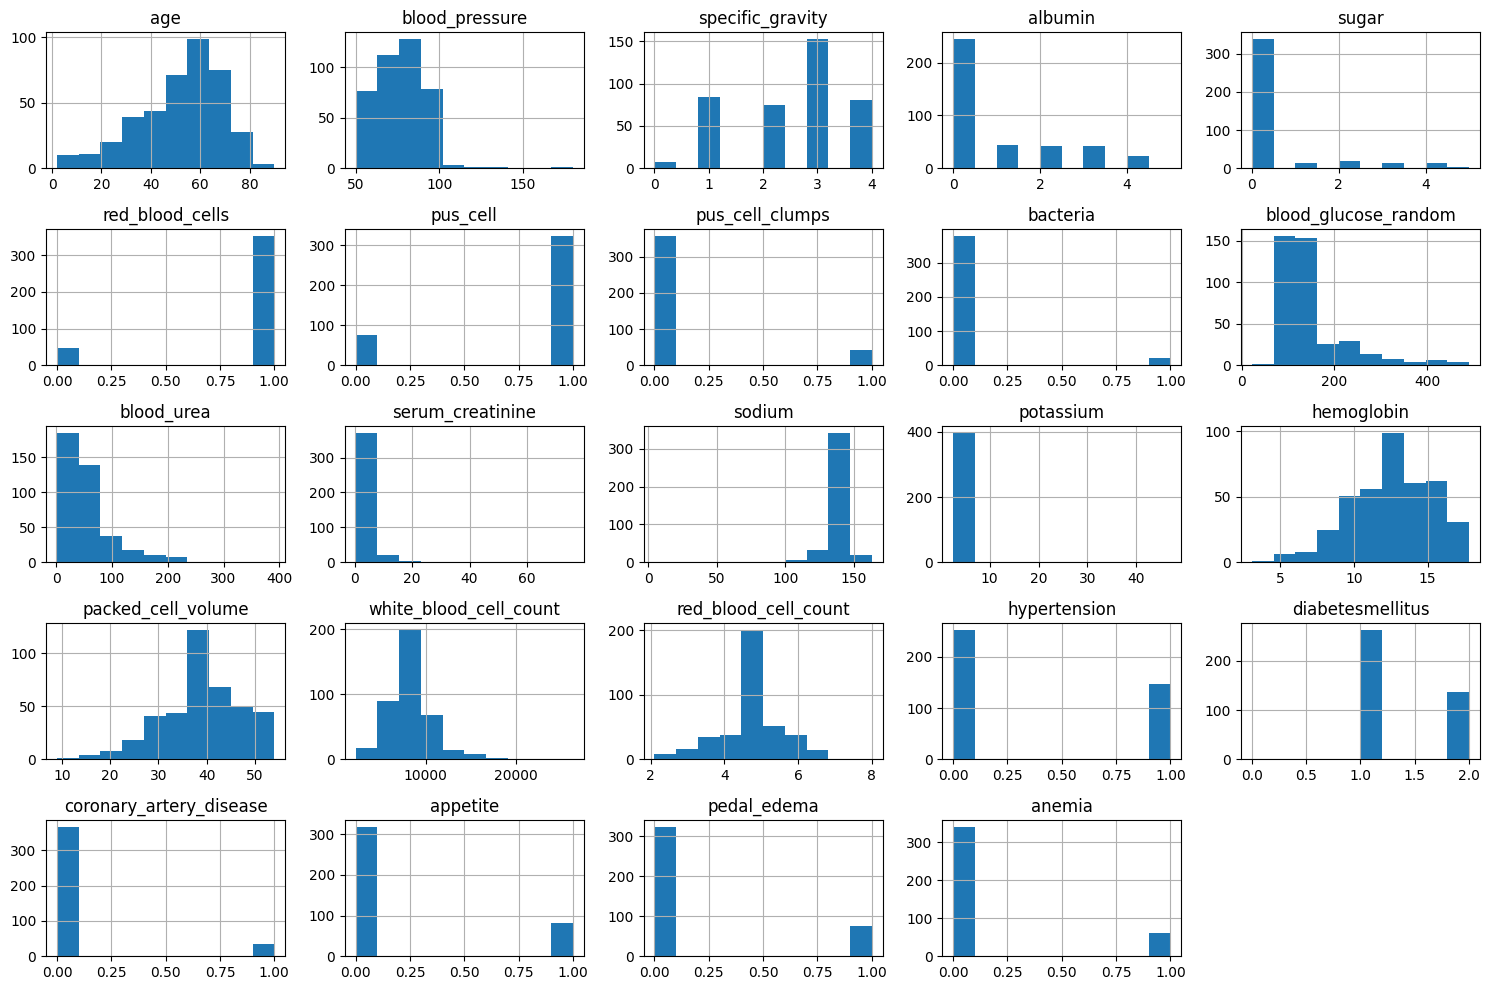

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of numerical columns
cont_cols = data.select_dtypes(include=np.number).columns.tolist()

# Remove the target variable if it's in the list
if 'class' in cont_cols:
    cont_cols.remove('class')

# Plot histograms for numerical columns
data[cont_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

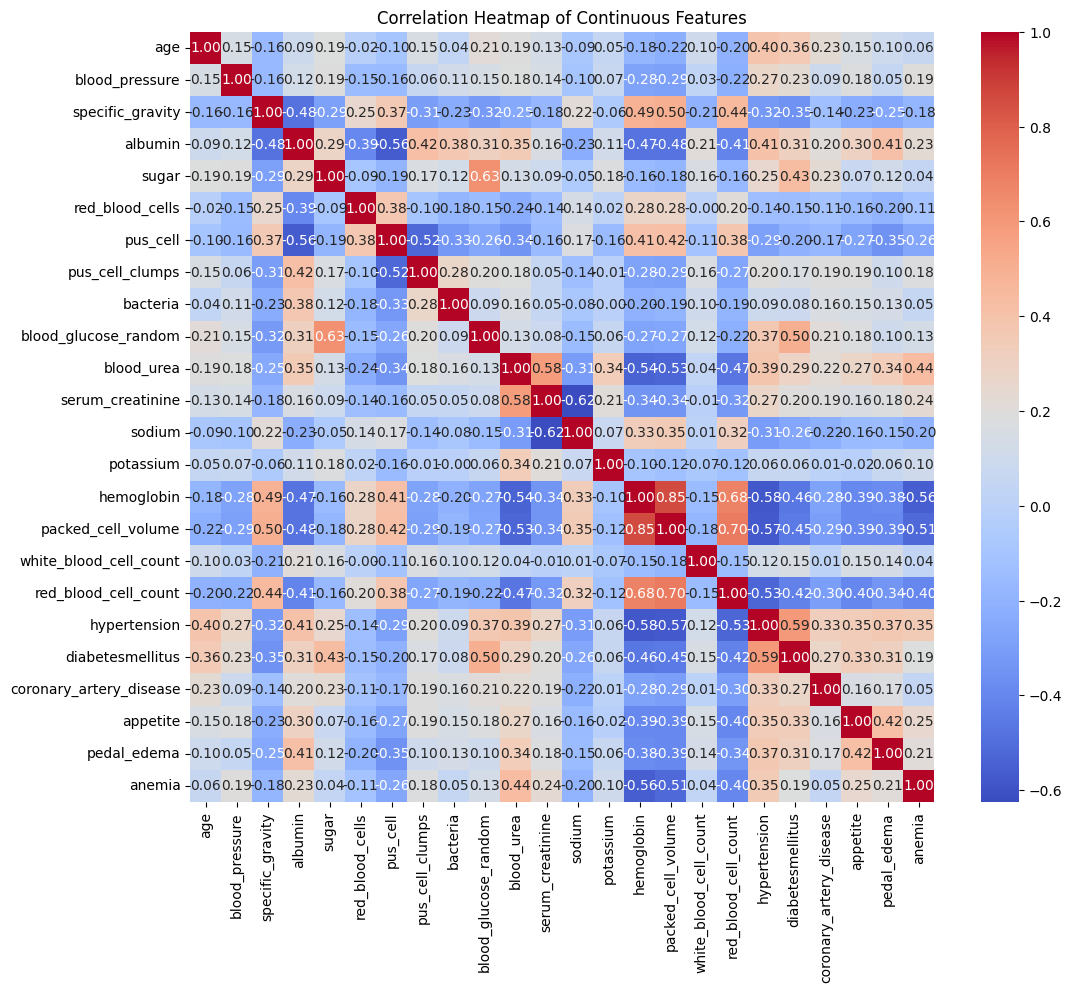

In [ ]:
# Plot heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(data[cont_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

# **Univariate Analysis**

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


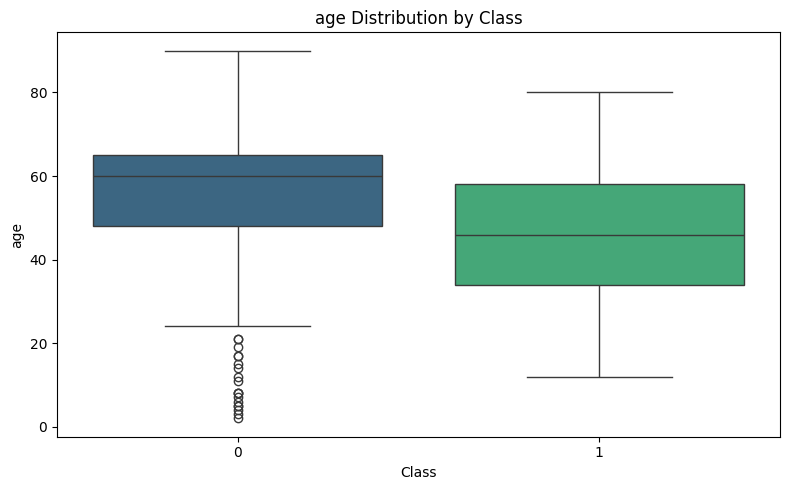

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


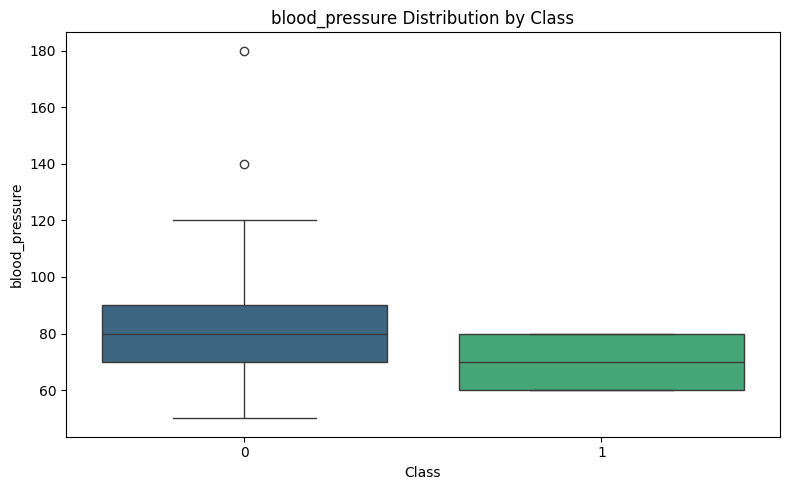

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


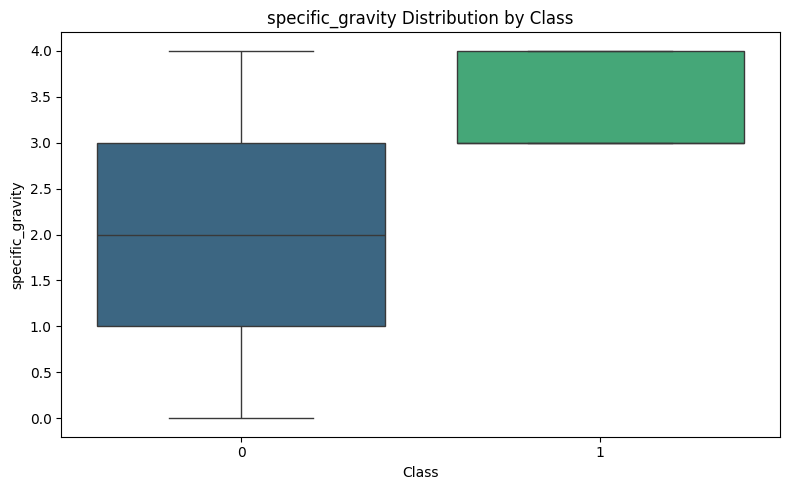

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


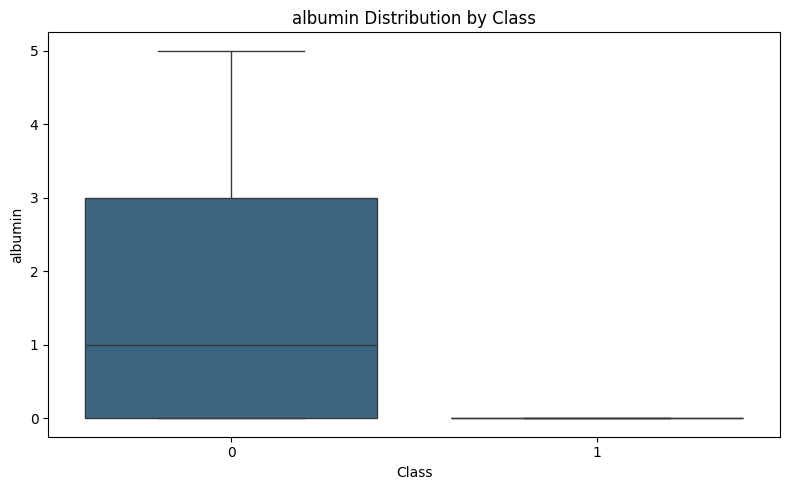

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


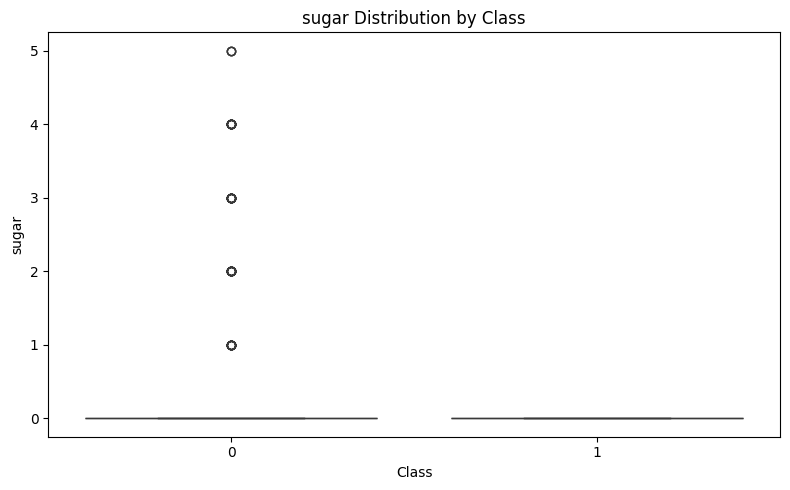

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


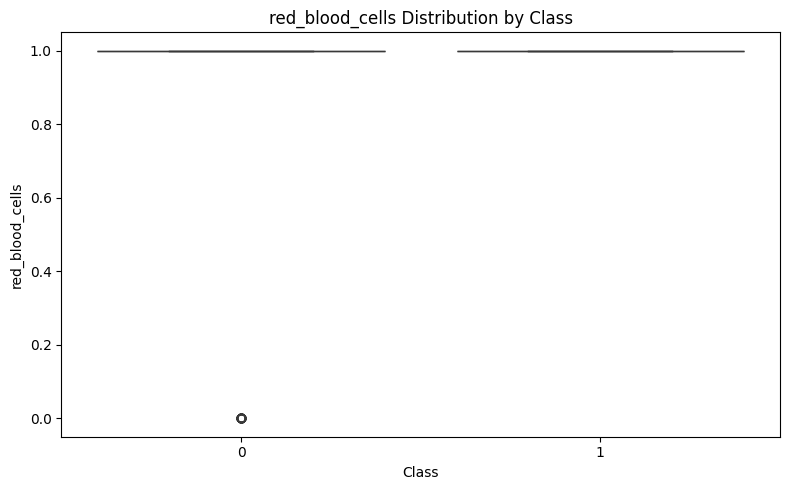

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


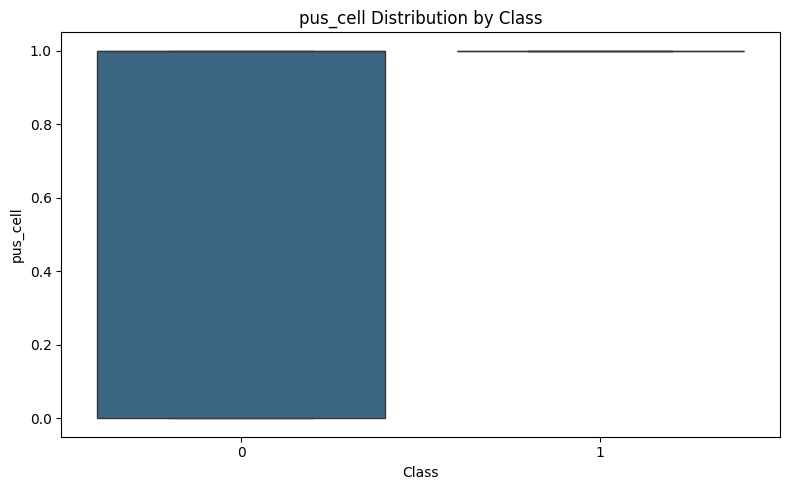

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


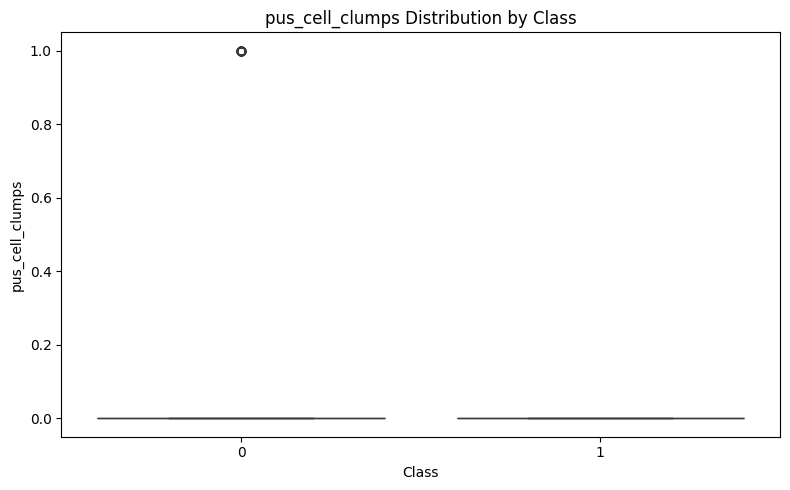

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


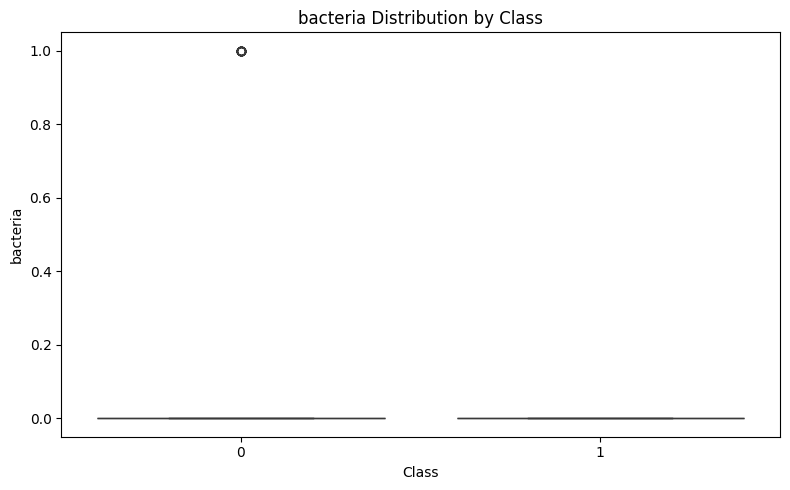

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


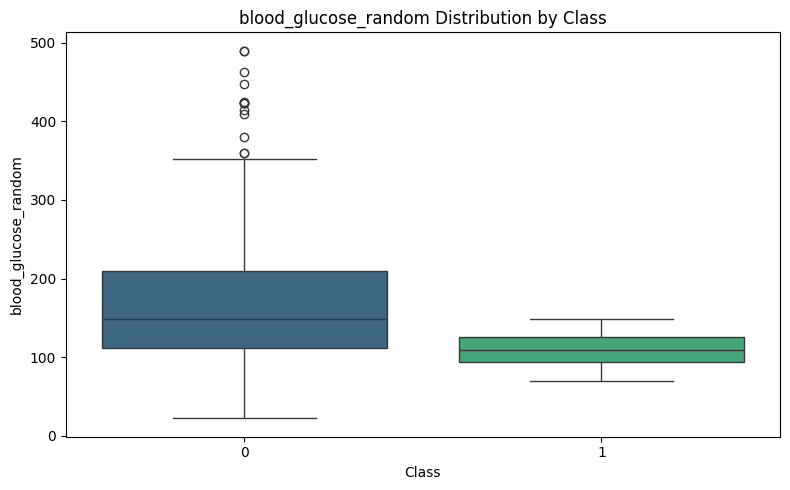

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


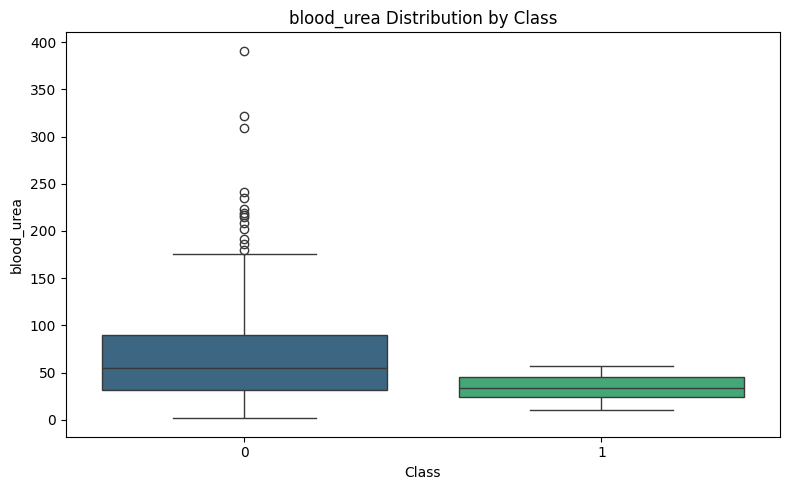

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


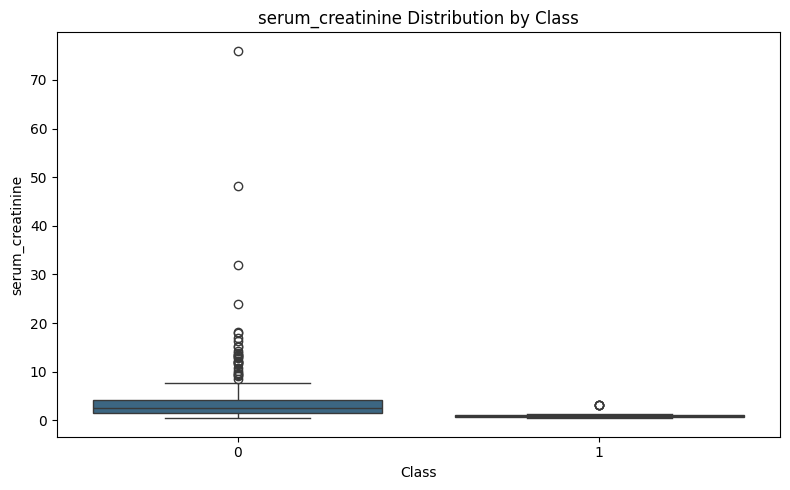

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


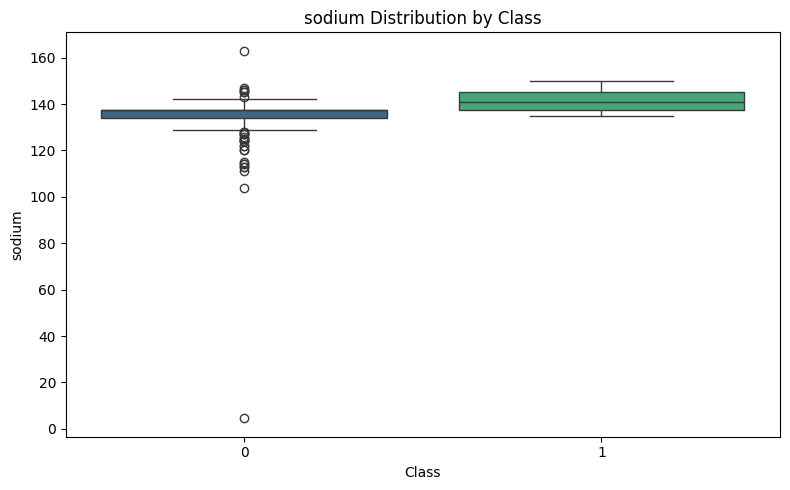

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


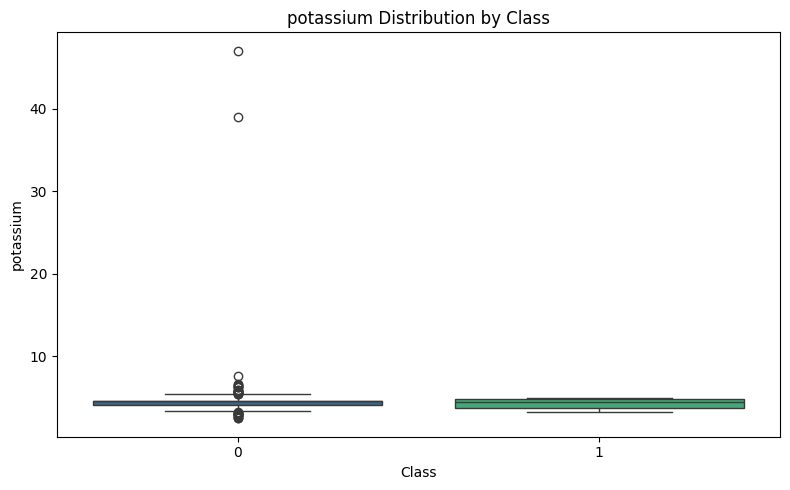

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


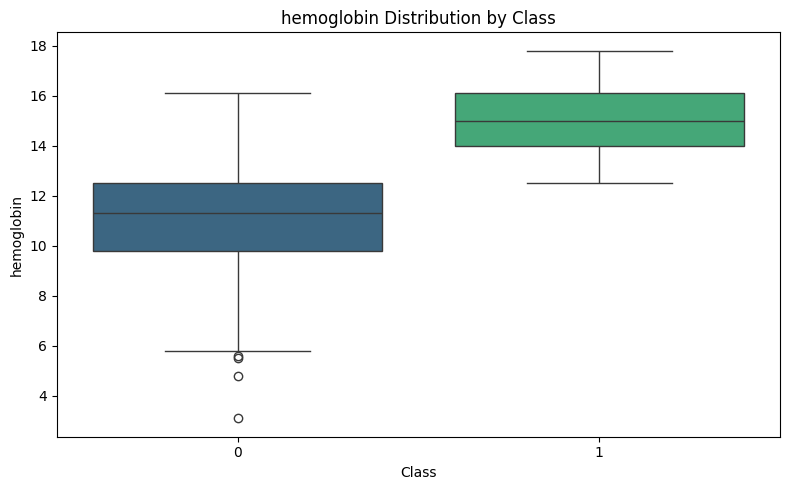

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


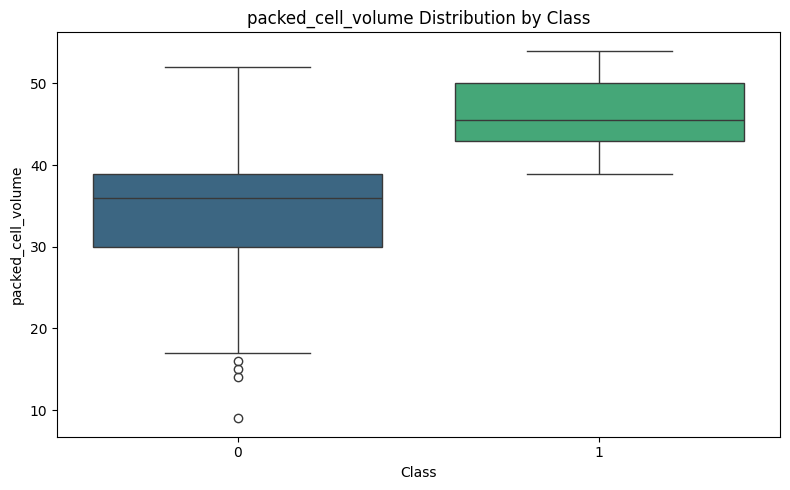

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


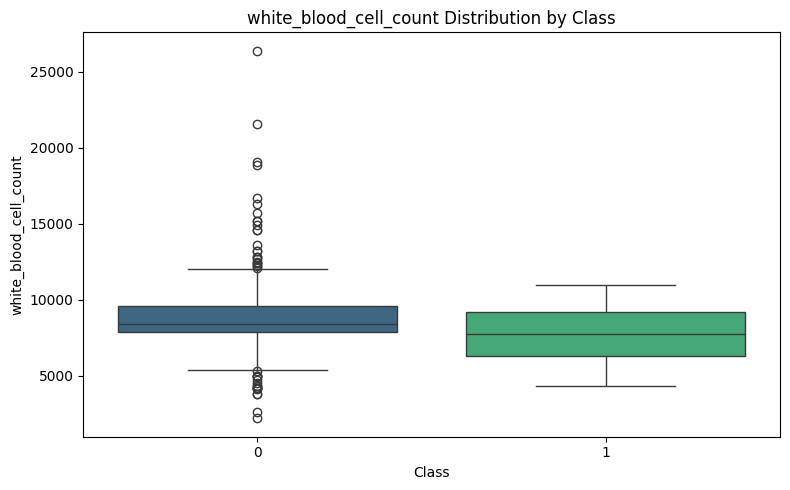

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


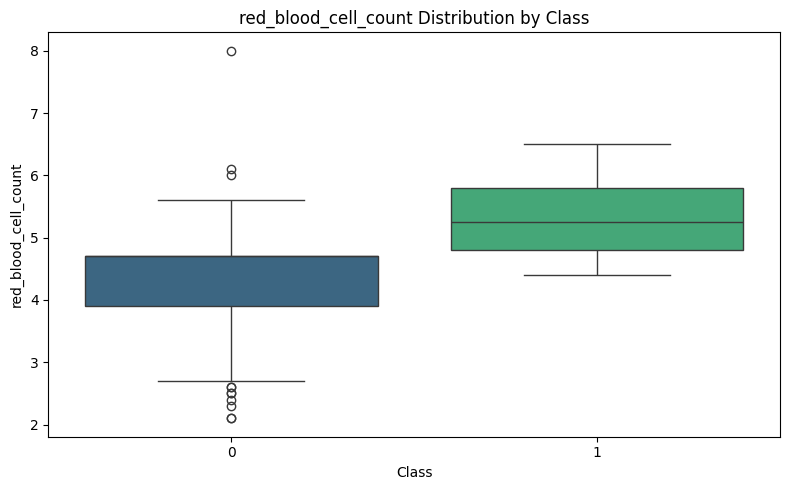

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


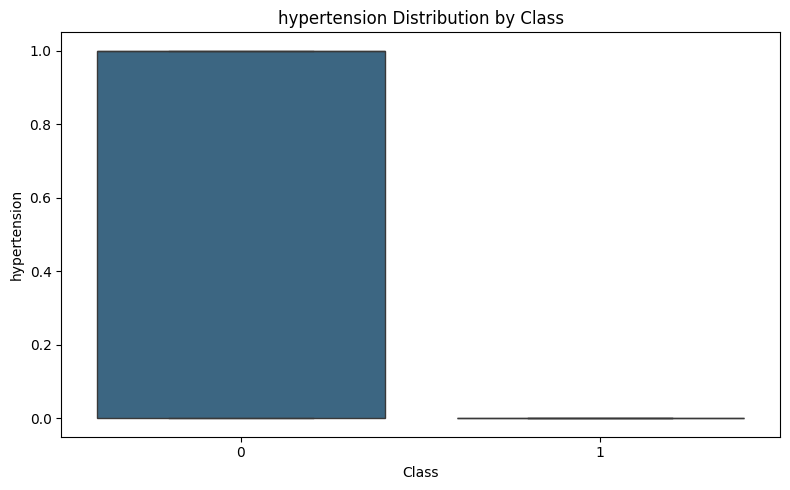

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


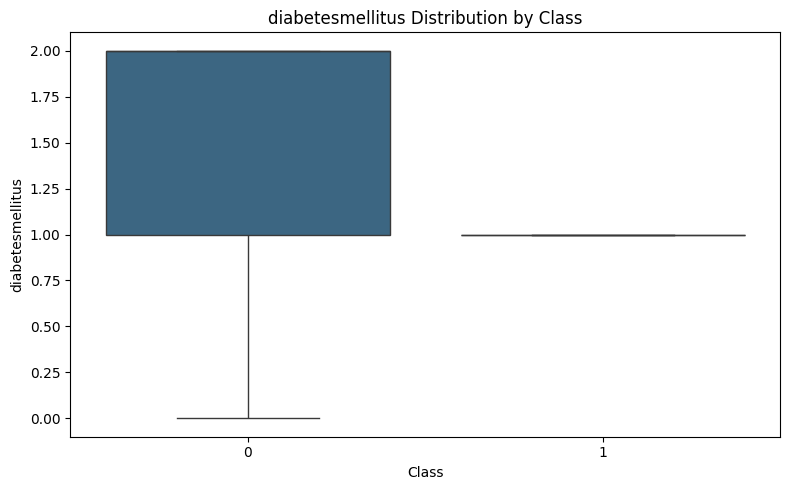

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


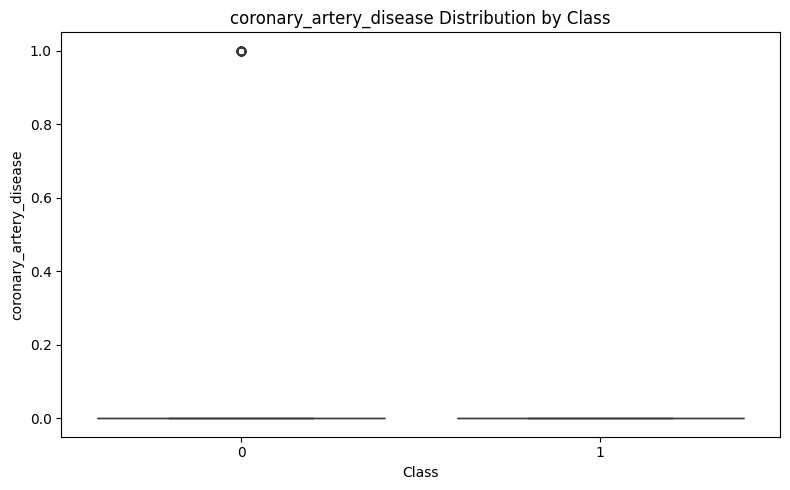

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


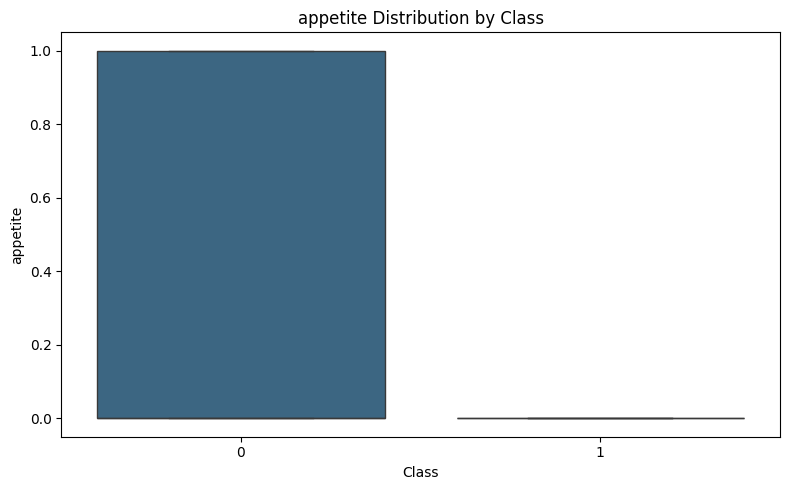

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


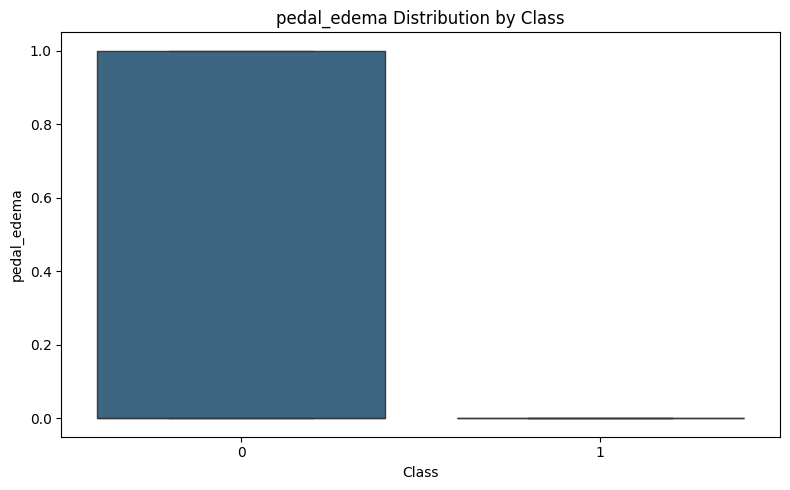

/tmp/ipython-input-48-4200313381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='class', y=col, palette='viridis')


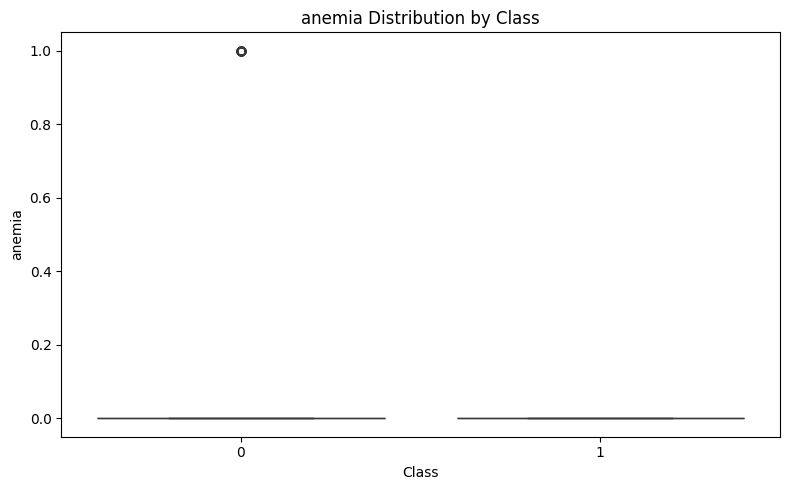

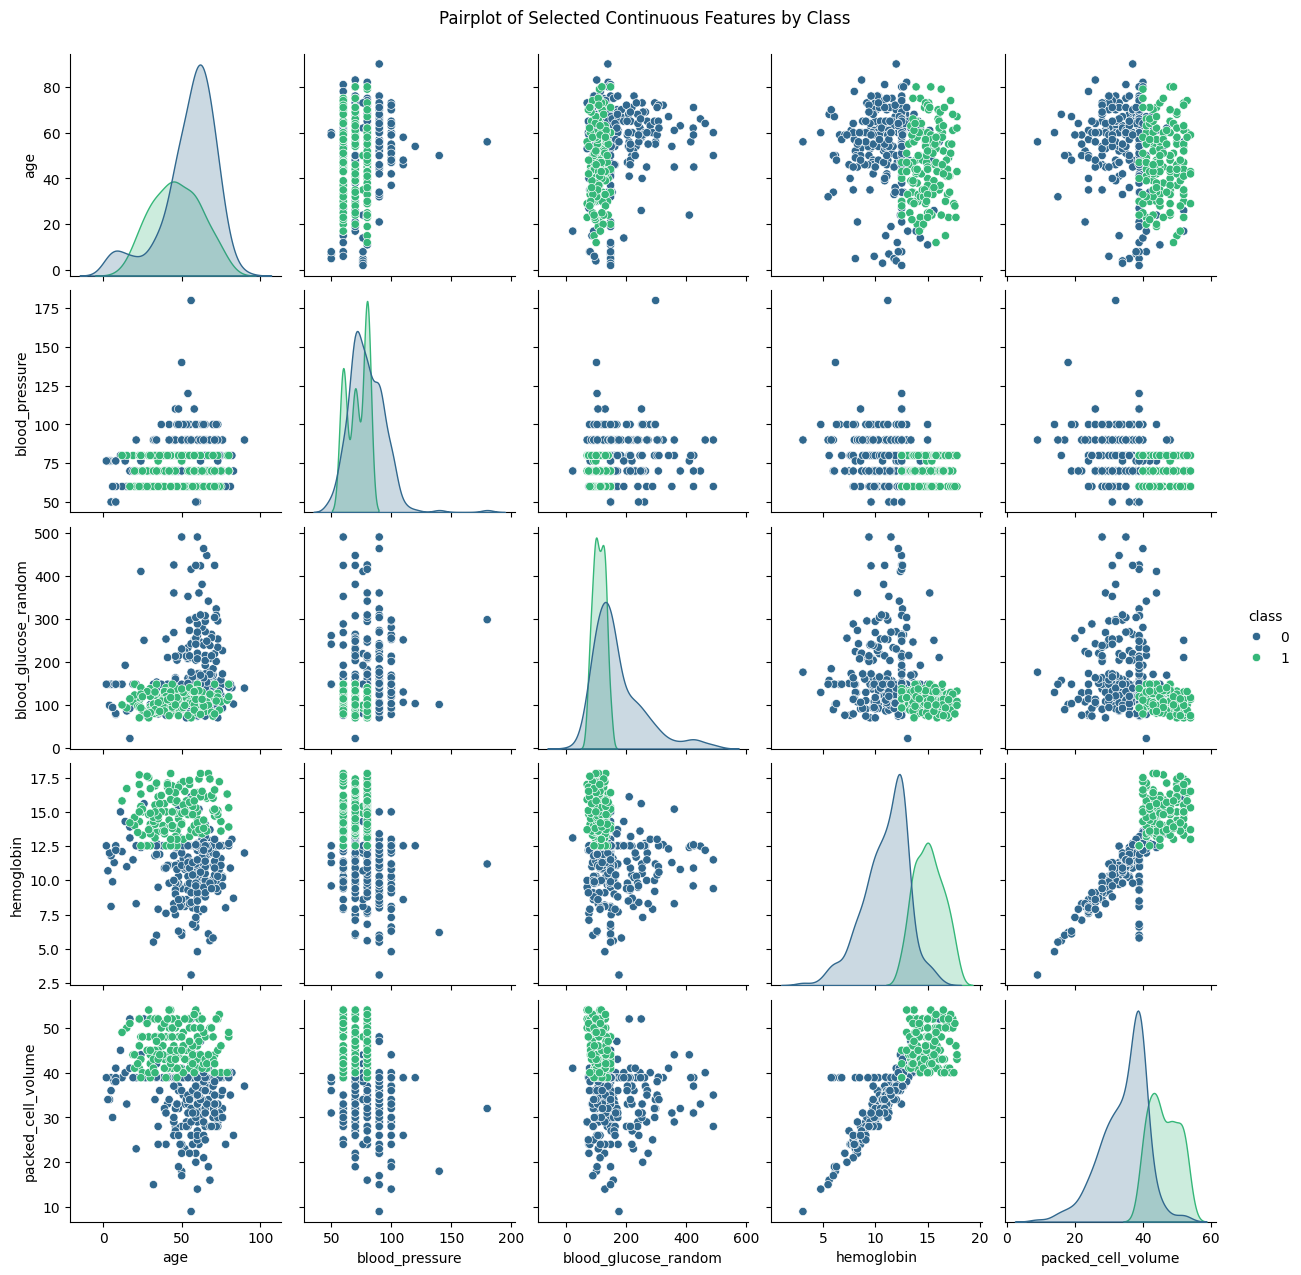


Missing values after imputation:
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64


In [ ]:
# Analyze categorical variables
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, hue='class', palette='viridis')
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Analyze numerical variables vs target variable using box plots
for col in cont_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='class', y=col, palette='viridis')
    plt.title(f'{col} Distribution by Class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Pairplot for a subset of numerical features (can be computationally intensive for many features)
# Selecting a few important numerical features for pairplot
subset_cont_cols = ['age', 'blood_pressure', 'blood_glucose_random', 'hemoglobin', 'packed_cell_volume', 'class']
sns.pairplot(data[subset_cont_cols], hue='class', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Continuous Features by Class', y=1.02)
plt.show()

# Check for missing values again after all imputation
print("\nMissing values after imputation:")
print(data.isnull().sum())

# **Bivariate Analysis**

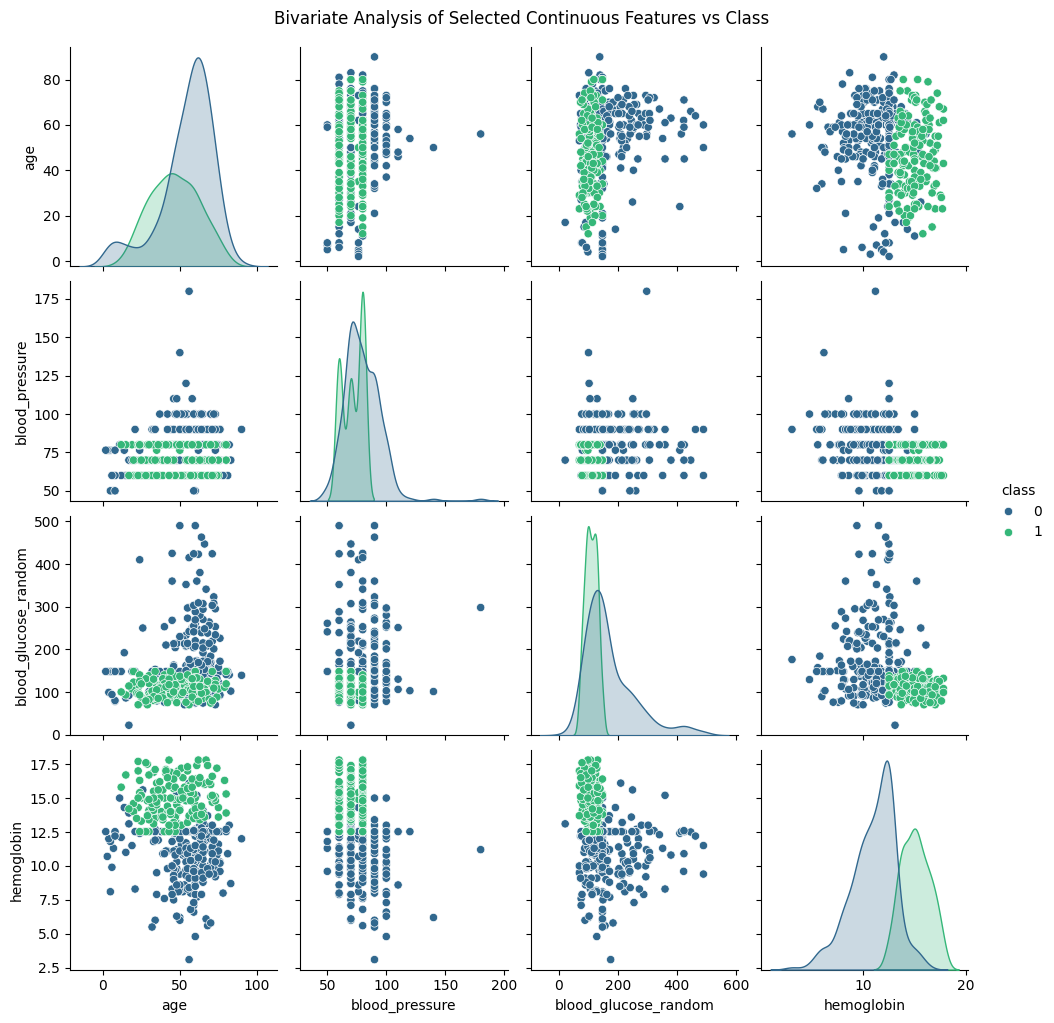

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


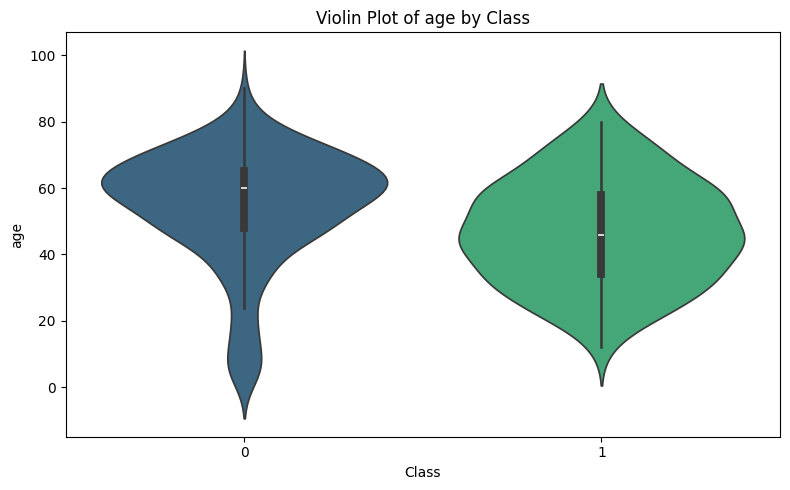

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


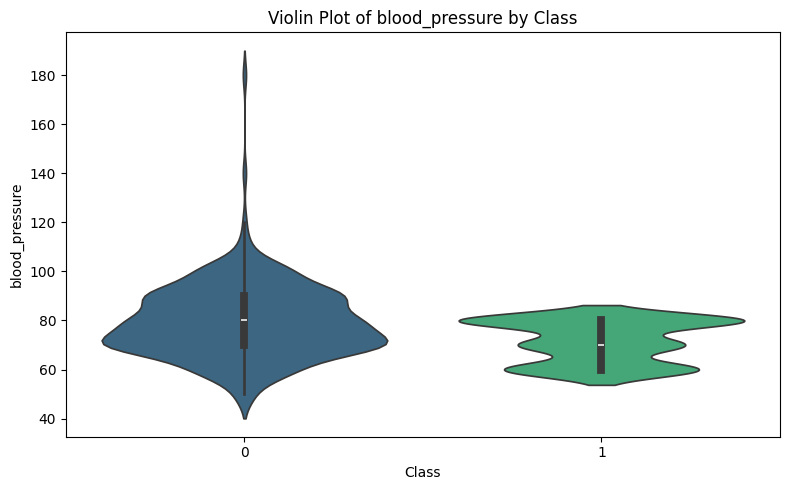

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


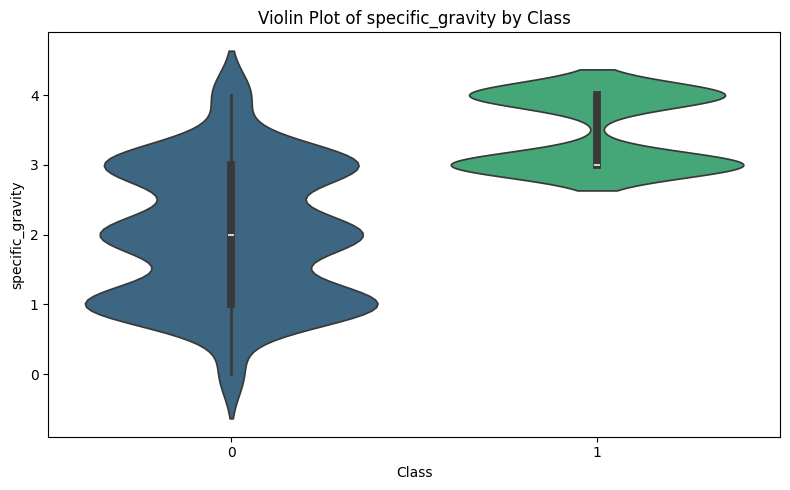

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


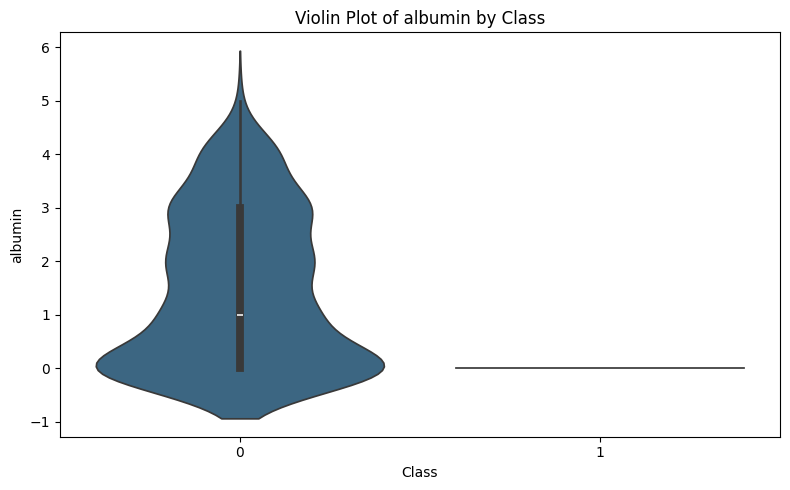

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


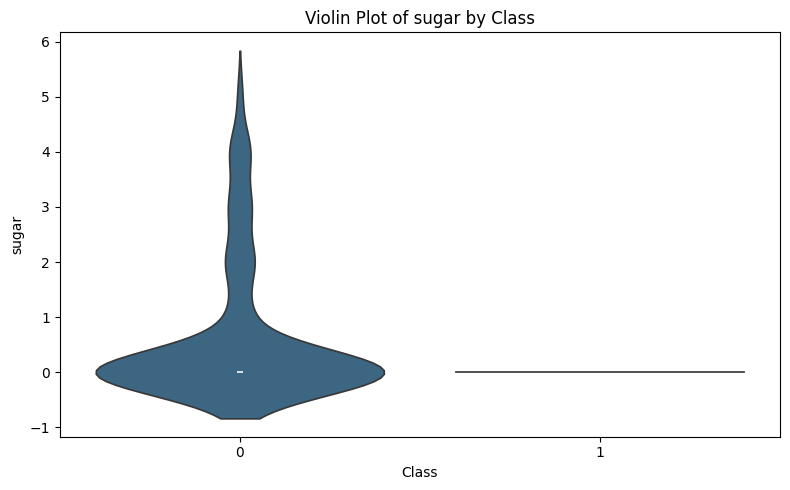

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


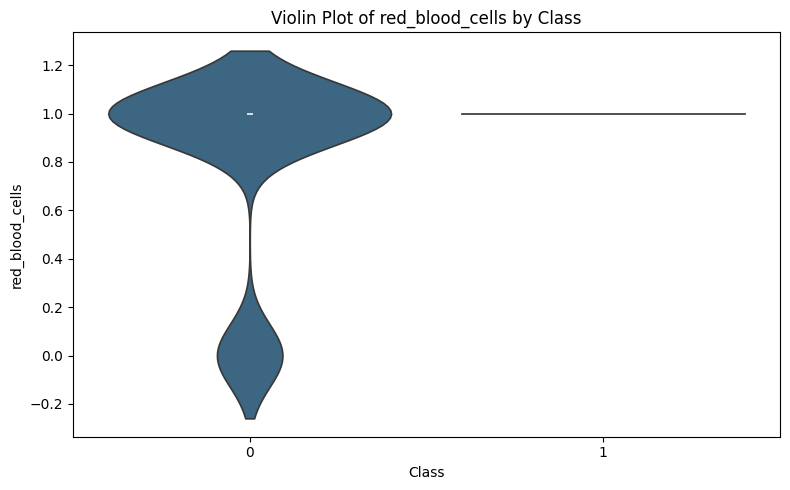

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


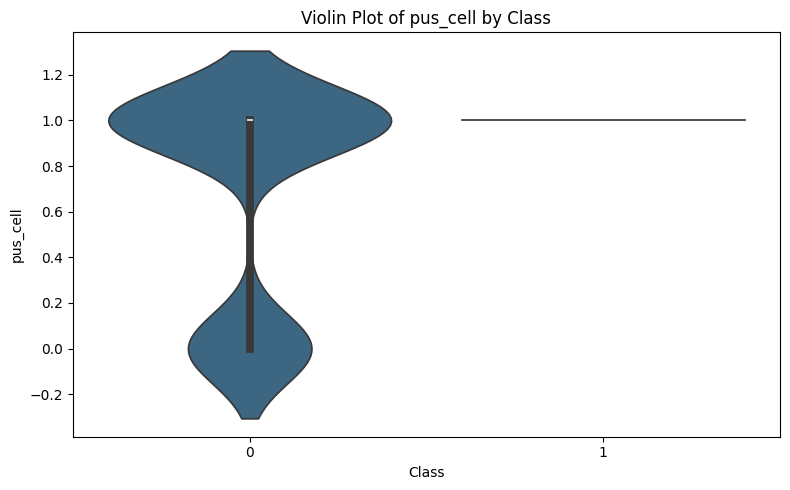

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


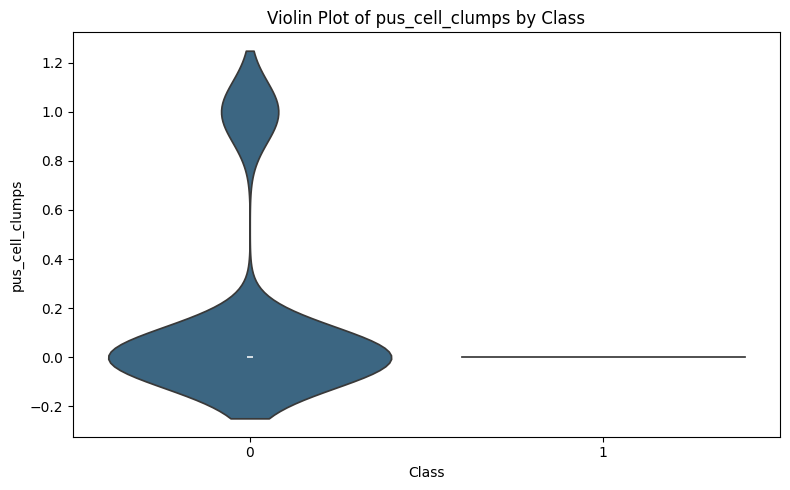

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


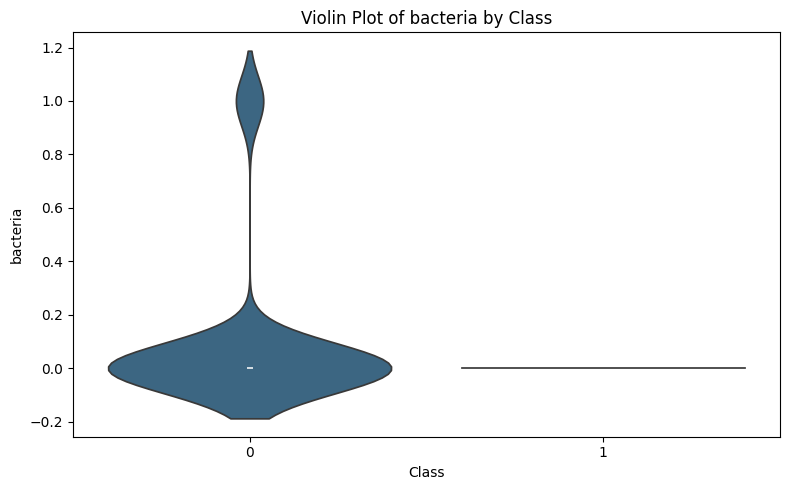

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


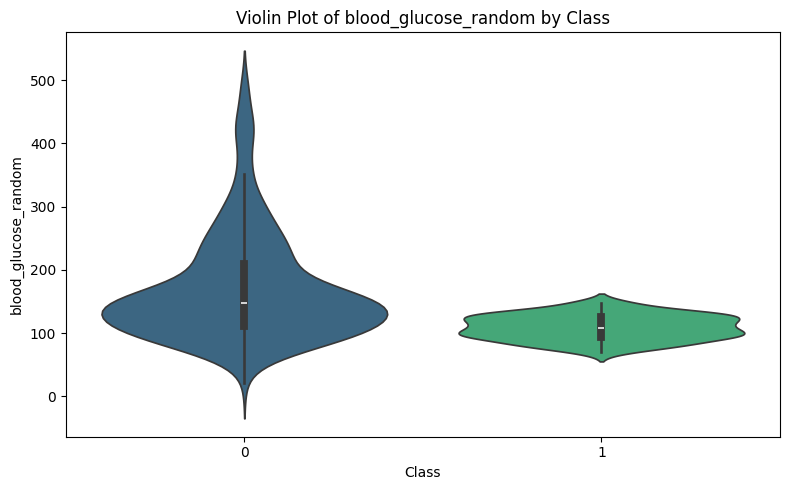

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


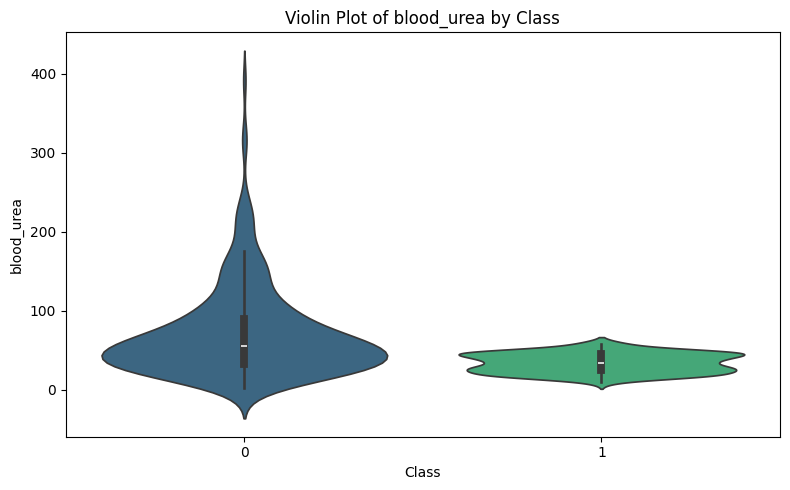

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


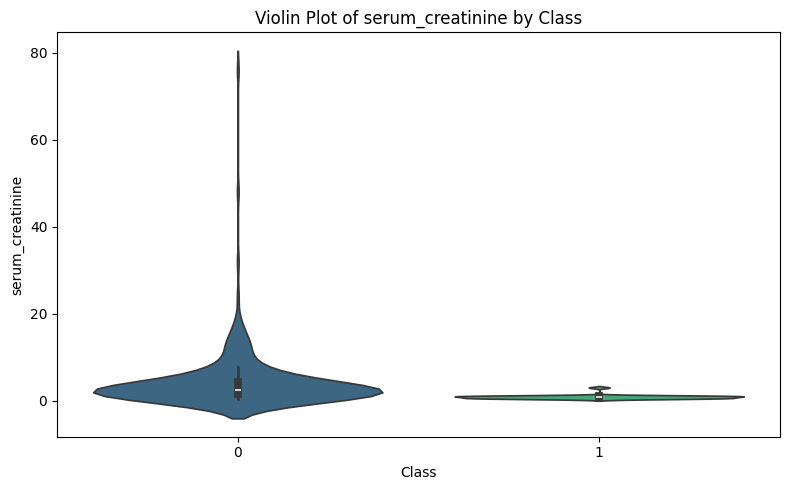

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


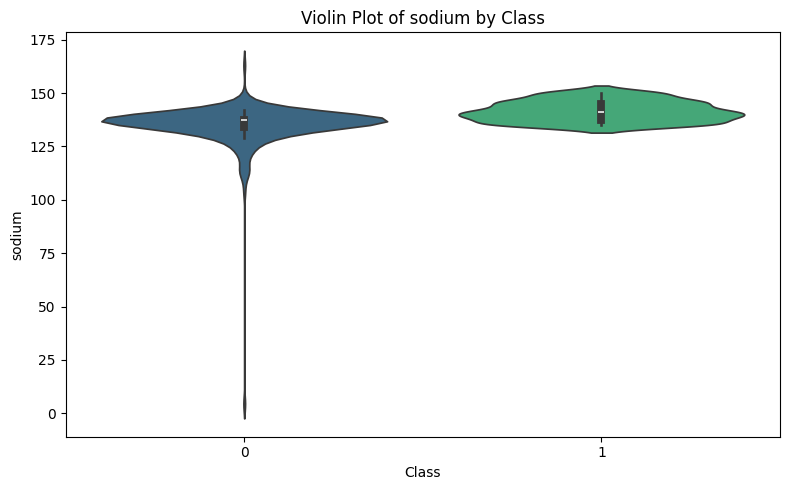

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


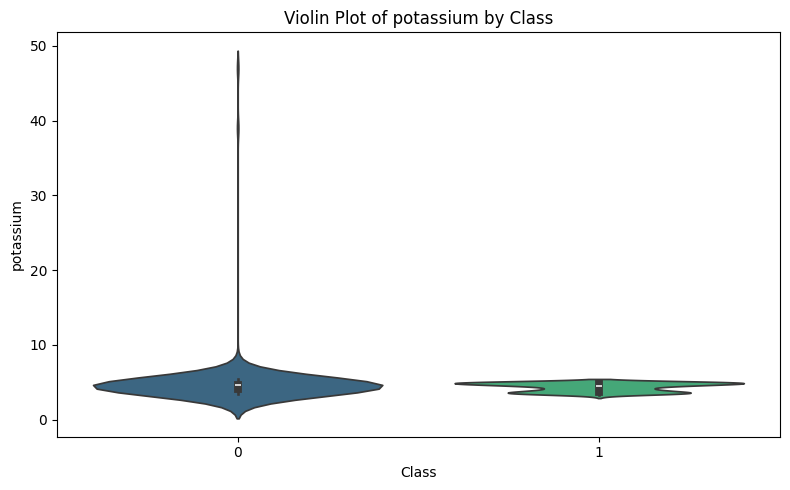

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


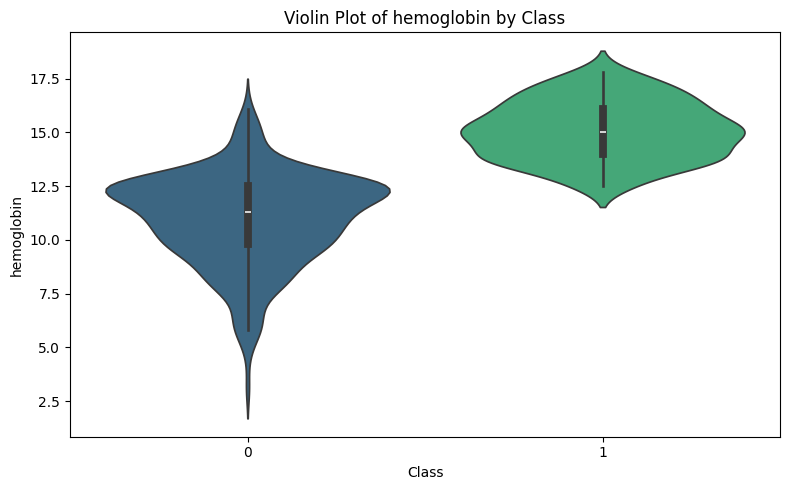

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


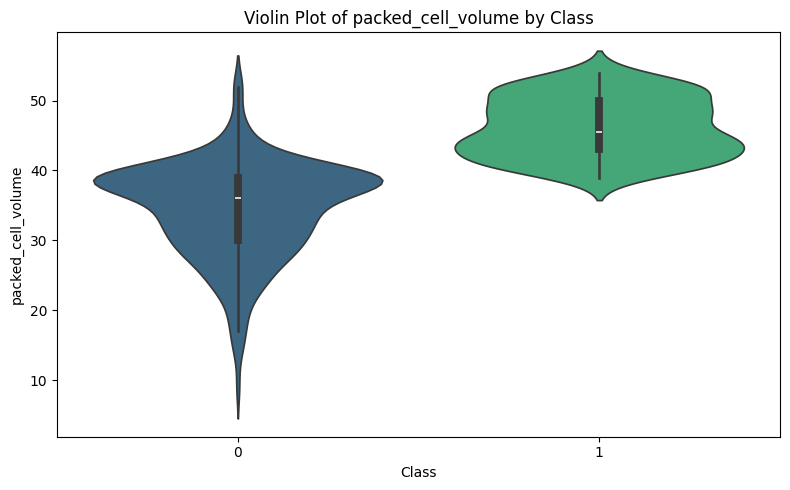

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


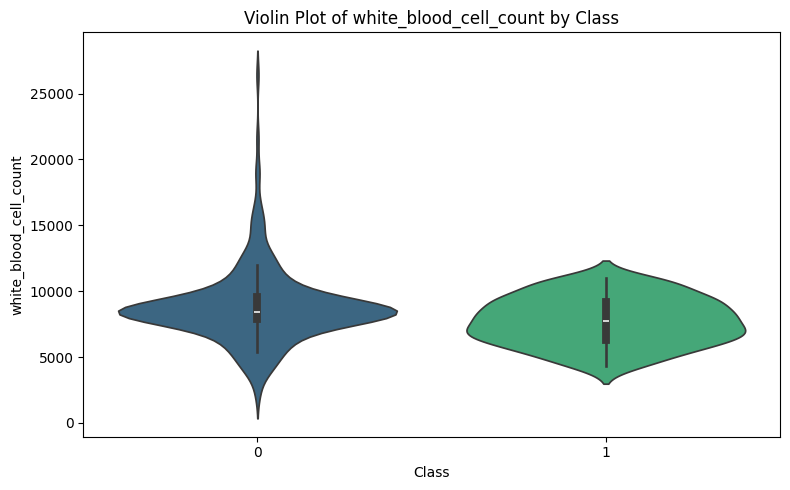

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


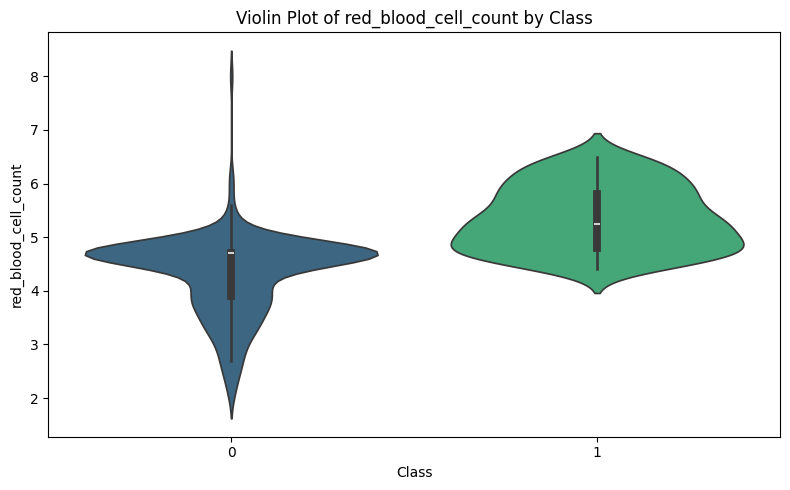

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


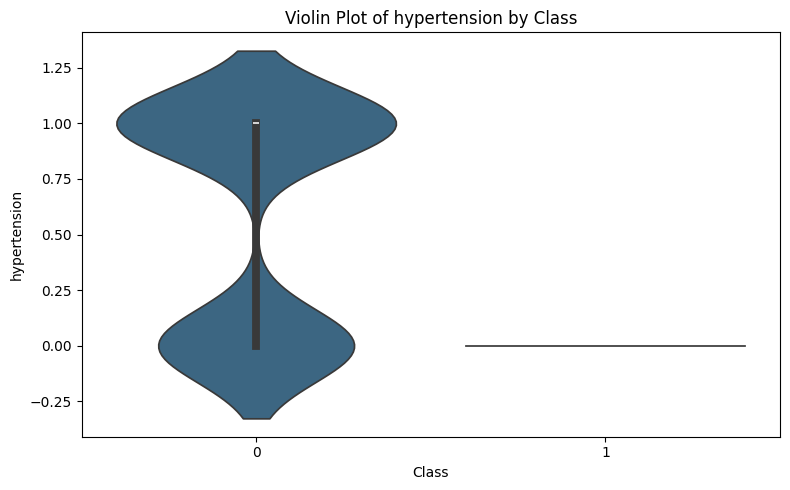

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


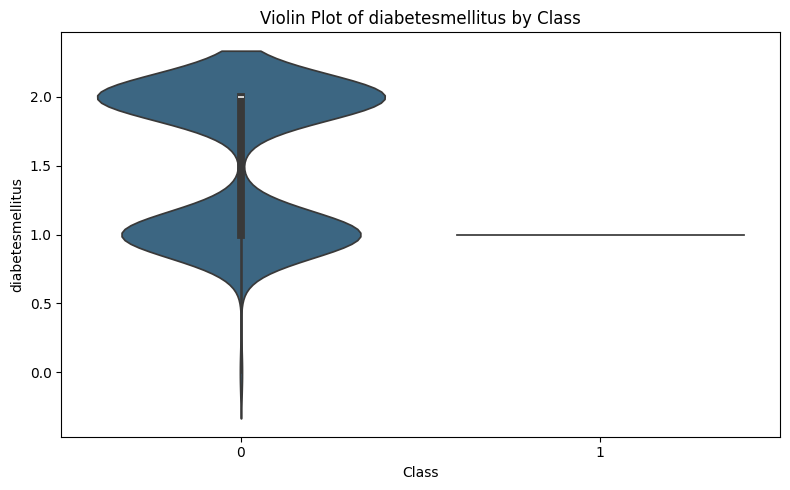

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


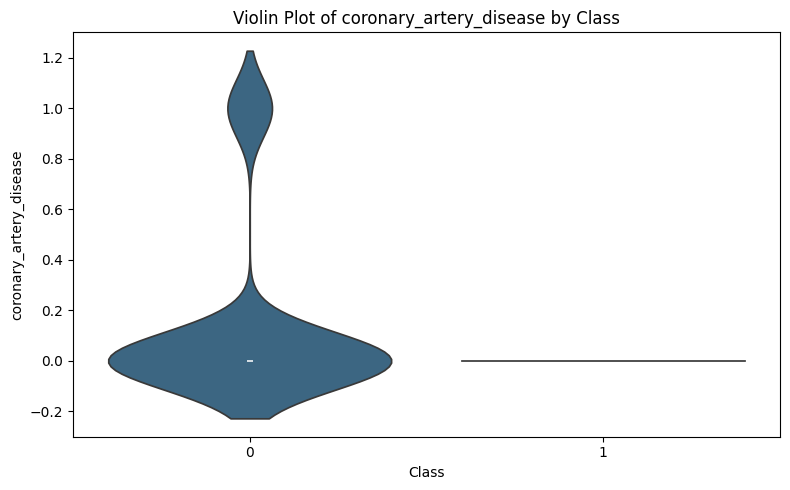

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


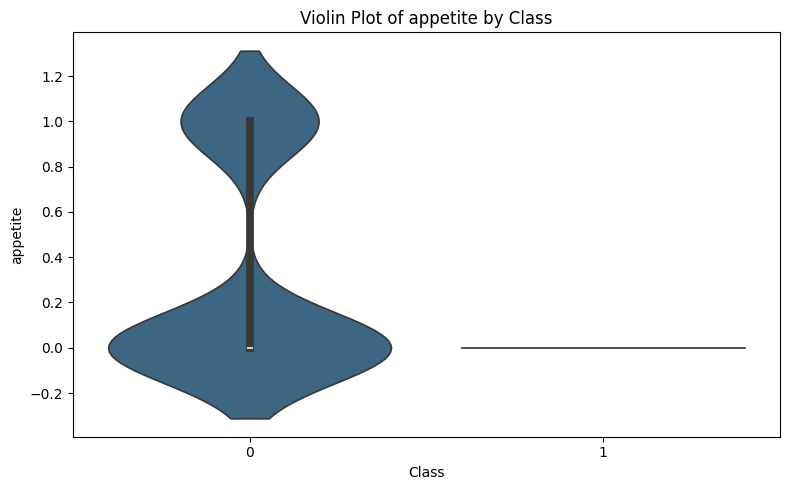

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


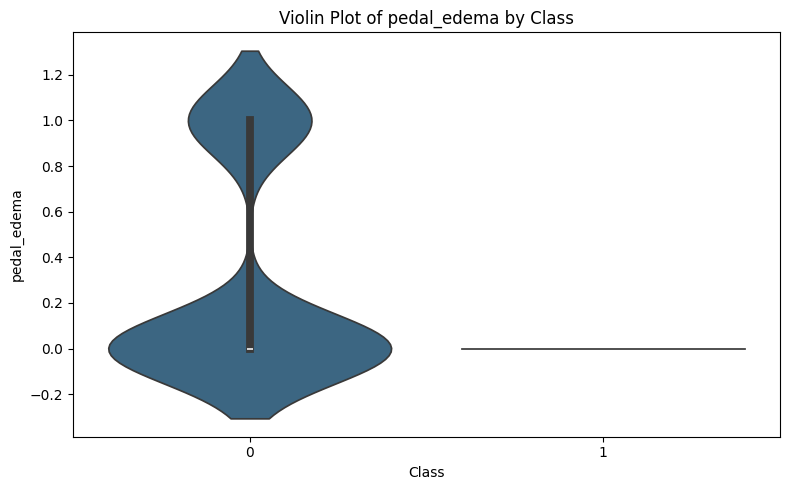

/tmp/ipython-input-49-1681851250.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='class', y=col, palette='viridis')


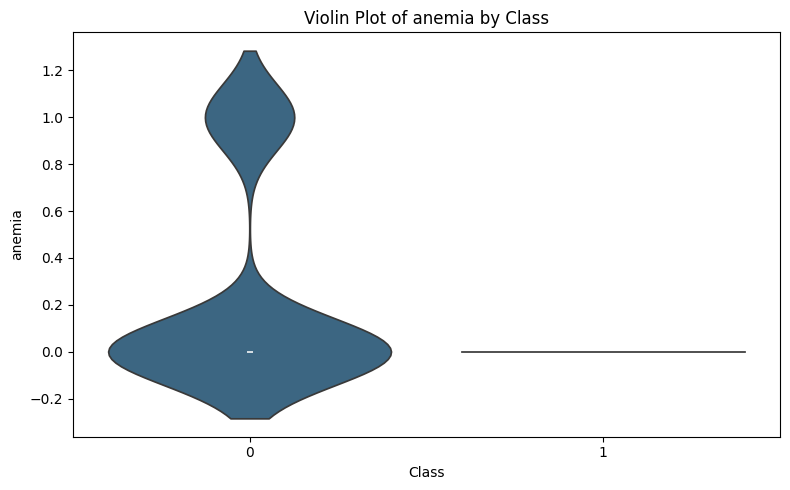

In [ ]:
# Scatter plots between selected continuous features and the target variable
# This visualizes the relationship between pairs of continuous variables, colored by the target class
sns.pairplot(data[['age', 'blood_pressure', 'blood_glucose_random', 'hemoglobin', 'class']], hue='class', kind='scatter', palette='viridis', diag_kind='kde')
plt.suptitle('Bivariate Analysis of Selected Continuous Features vs Class', y=1.02)
plt.show()

# Stacked bar plots for categorical features vs target variable
# This shows the distribution of the target class within each category of a categorical feature
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    # Create a cross-tabulation of the categorical feature and the target
    ct = pd.crosstab(data[col], data['class'])
    ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
    plt.title(f'Stacked Bar Plot of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Violin plots for numerical features vs target variable
# Combines boxplot and kernel density estimate, showing distribution shape
for col in cont_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=data, x='class', y=col, palette='viridis')
    plt.title(f'Violin Plot of {col} by Class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# **Multivariate Analysis**

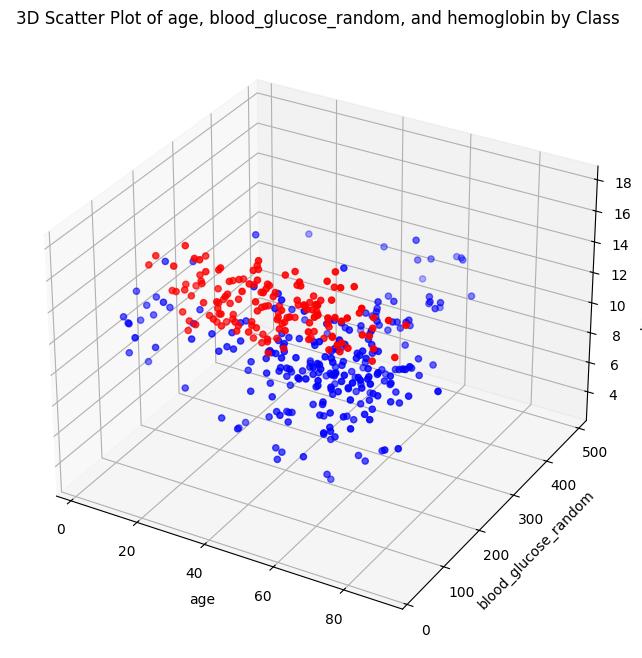

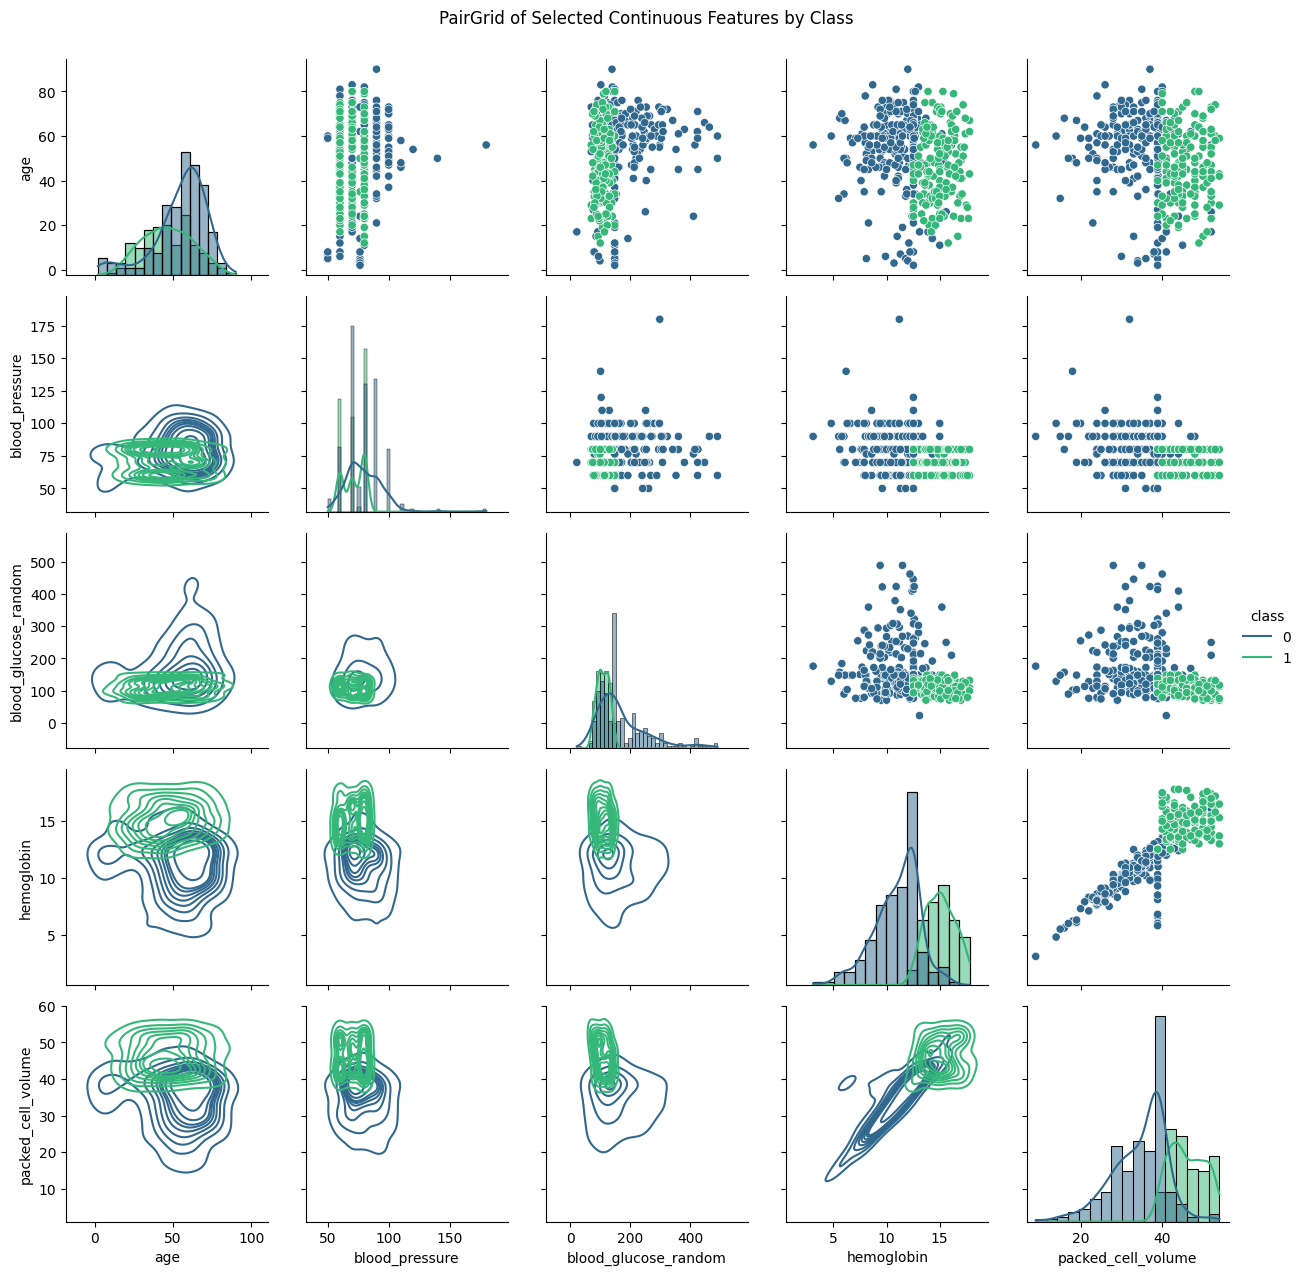

In [ ]:
 # 3D Scatter plot for three selected continuous features
# Selecting three potentially important continuous features for a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

# Choose three continuous features that you want to visualize in 3D
# You might want to choose features that showed interesting relationships in bivariate analysis
feature1 = 'age'
feature2 = 'blood_glucose_random'
feature3 = 'hemoglobin'

# Ensure these features are in the continuous columns list
if feature1 not in cont_cols or feature2 not in cont_cols or feature3 not in cont_cols:
    print("Selected features for 3D plot are not all continuous.")
else:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Map the target variable to colors
    colors = data['class'].map({0: 'blue', 1: 'red'}) # Assuming 'class' is 0 or 1 after encoding

    ax.scatter(data[feature1], data[feature2], data[feature3], c=colors, marker='o')

    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    plt.title(f'3D Scatter Plot of {feature1}, {feature2}, and {feature3} by Class')
    plt.show()
# Pairgrid with different plots for upper, lower, and diagonal
# This provides a more detailed multivariate view than a simple pairplot
g = sns.PairGrid(data[subset_cont_cols], hue='class', palette='viridis')
g.map_diag(sns.histplot, kde=True) # Histograms on diagonal
g.map_upper(sns.scatterplot)     # Scatter plots on upper triangle
g.map_lower(sns.kdeplot)       # KDE plots on lower triangle
g.add_legend()
plt.suptitle('PairGrid of Selected Continuous Features by Class', y=1.02)
plt.show()

In [ ]:
import os
os.listdir()


['.config',
 'gradient_boosting_model.pkl',
 'chronickidneydisease_dataset.csv',
 'logistic_regression_model.pkl',
 'random_forest_model.pkl',
 'decision_tree_model.pkl',
 'sample_data']

In [ ]:
from google.colab import files
files.download('gradient_boosting_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('logistic_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('decision_tree_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>